Here we will continue analysis of the pandemy of coronavirus in the Netherlands.
Let's try fitting the data to the function. First, lets load needed packages and data

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

per_day=[1,1,4,3,10,5,14,44,46,60,76,57,61,121,111,190] #new cases per day
#find cumulative number of sick in these days
cum=[per_day[0]]
for i in range(1,len(per_day)):
   cum.append(per_day[i]+cum[-1])
print("cumulative:", cum)

cumulative: [1, 2, 6, 9, 19, 24, 38, 82, 128, 188, 264, 321, 382, 503, 614, 804]


we will test two functions, one is exponential type, another is a time-function, as following:

In [4]:
#exponential
def fit_fun_exp(x, a, b):
    return a**x + b
#time
def fit_fun_time(x, a, b):
    return x**a + b


let's check exponential function first

In [15]:
params_pd = curve_fit(fit_fun_exp, range(len(per_day)), per_day)
[a, b] = params_pd[0]
print("found parameters", a,b)
predict_pd=[a**x +b for x in range(len(per_day))]
day16_pd=a**16+b
print("new per day 16", int(day16_pd))


found parameters 1.8647558197306555 -5.776978982643171
new per day 16 21371


In [16]:
params_cm=curve_fit(fit_fun_exp, range(len(cum)), cum)
[a, b] = params_cm[0]
print("found parameters", a,b)
predict_cm=[a**x +b for x in range(len(cum))]
day16cum=a**16+b
print("cumulative on day 16", int(day16cum))


found parameters 2.4536092682040946 -21.7347870034131
cumulative on day 16 1725365


let's check how curve fits to data

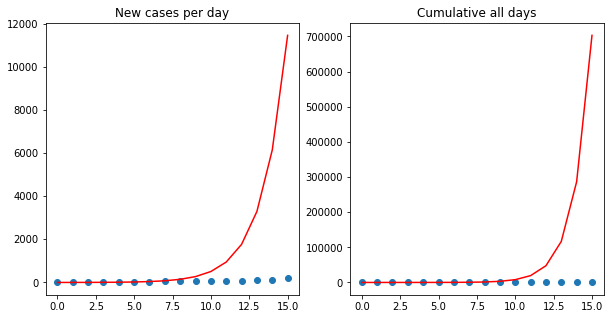

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("New cases per day")
plt.scatter(range(len(per_day)), per_day)
plt.plot(range(len(per_day)), predict_pd, c="red")
plt.subplot(122)
plt.title("Cumulative all days")
plt.scatter(range(len(cum)), cum)
plt.plot(range(len(cum)), predict_cm, c="red")

exponential function failed completely. Let's try time function instead

In [22]:
params_pd = curve_fit(fit_fun_time, range(len(per_day)), per_day)
[a, b] = params_pd[0]
print("found parameters", a,b)
predict_pd=[x**a +b for x in range(len(per_day))]
day16_pd=16**a+b
print("new per day 16", int(day16_pd))

params_cm=curve_fit(fit_fun_time, range(len(cum)), cum)
[c, d] = params_cm[0]
print("found parameters", c,d)
predict_cm=[x**c +d for x in range(len(cum))]
day16cum=16**c+d
print("cumulative on day 16", int(day16cum))


found parameters 1.8647558197306555 -5.776978982643171
new per day 16 170
found parameters 2.4536092682040946 -21.7347870034131
cumulative on day 16 878


and do the plot

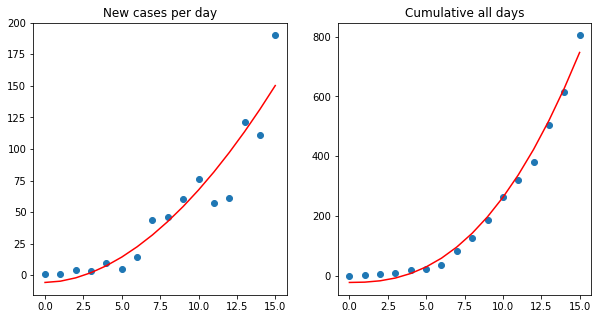

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("New cases per day")
plt.scatter(range(len(per_day)), per_day)
plt.plot(range(len(per_day)), predict_pd, c="red")
plt.subplot(122)
plt.title("Cumulative all days")
plt.scatter(range(len(cum)), cum)
plt.plot(range(len(cum)), predict_cm, c="red")

This works much better.
If we want to predict the numbers to any day in a future, we can use calculate *a* and *b*
and run the formula

In [23]:
day=30
day_pd=day**a+b
print("new per day", day, int(day_pd))
day_cum=day**c+d
print("cumulative on day", day, int(day_cum))


new per day 30 562
cumulative on day 30 4188


You can make prediction for any day and compare when the time will come. What's the use?
First, it is a pure curiosity, how difficult is to make predictions. Second, by fitting data to the curve we can better detect the change of the trend. It will mean, that time fit will begin to deviate systematically. Now it is not yet the case.

# Note, this script is made purely for educational purposes